<a href="https://colab.research.google.com/github/priyadarshihere/background-generator/blob/master/clustering_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.read_csv("/content/HR_comma_sep.csv")

In [52]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [55]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [56]:
df.promotion_last_5years.unique()

array([0, 1])

In [57]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [0]:
df.salary = df.salary.map({
    "low" : 0,
    "medium": 1,
    "high" : 2
})

In [63]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


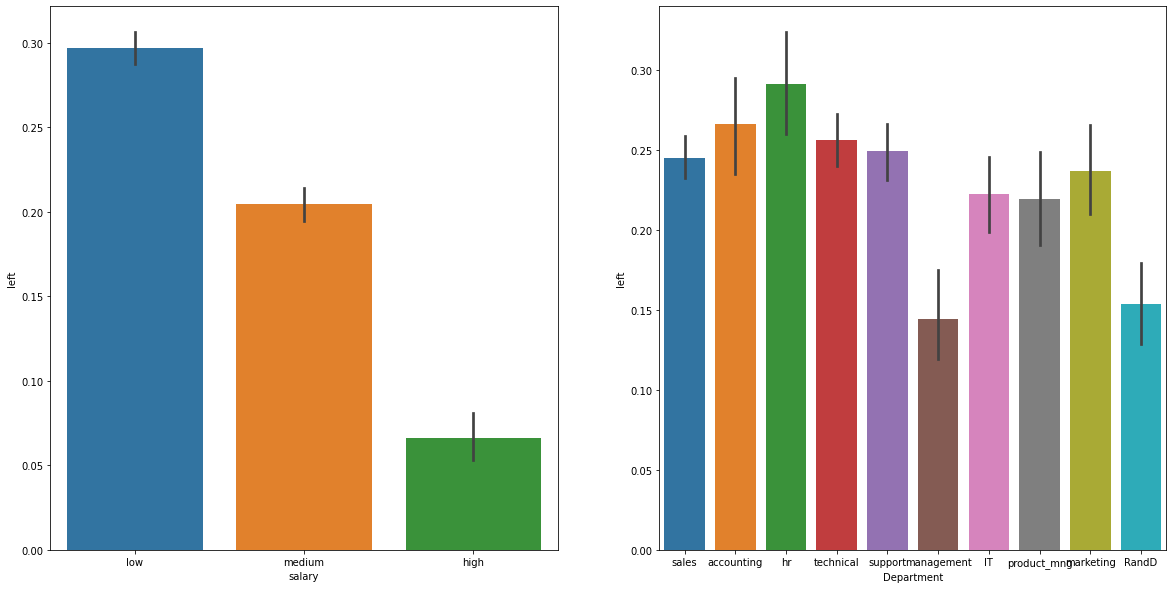

In [59]:
fig,axis = plt.subplots(1,2, figsize = (20,10))
sns.barplot(x = df.salary, y = df.left , ax = axis[0] )
sns.barplot(x= df.Department , y = df.left , ax = axis[1])

In [0]:
x = df[["salary","promotion_last_5years","satisfaction_level","time_spend_company", "average_montly_hours"]].values
y = df["left"].values

In [0]:
xtrain , xtest, ytrain, ytest = train_test_split(x,y , test_size = 0.25)

In [72]:
lg = LogisticRegression()
lg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lg.predict([[0,0,0.40,6 , 157]])

In [77]:
y_pred

array([1])

In [0]:
predict = lg.predict(x)


In [0]:
df["Predict"] = predict

In [83]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [84]:
df.Predict.value_counts()

0    13241
1     1758
Name: Predict, dtype: int64

In [0]:
cm = confusion_matrix(df.left.values,df.Predict.values)

In [88]:
cm

array([[10615,   813],
       [ 2626,   945]])

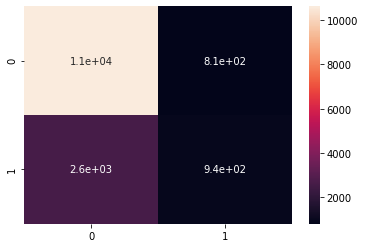

In [90]:
sns.heatmap(cm , annot = True)

In [0]:
accuracy = (cm[0][0] + cm[1][1])/df.Predict.size

In [100]:
accuracy

0.770718047869858

In [94]:
accuracy_score(df.left.values, df.Predict.values)

0.770718047869858